## Boston House Price - Linear Regression (Stepwise)

In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Visualisation Libraries:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import modules from sklearn library:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [16]:
# Load Boston housing dataset (from sklearn.datasets)

from sklearn.datasets import load_boston
boston = load_boston()

In [15]:
# Print information about dataset:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

From looking at the output, there are 13 data variables (X) and 1 target varaible 'MEDV' (Y).

In [17]:
# Apply dataframe using Pandas:

bos = pd.DataFrame(boston.data, columns=boston.feature_names)
print(bos)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

Above we can see just the 13 data variables (X).

In [18]:
# Add target variable (extra column) to dataset. The PRICE data is the median value of owener occupied homes ($1000s)
bos['PRICE'] = boston.target
print(bos)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

In [22]:
bos.shape

(506, 14)

This dataset now has both data and target variables, (14 columns in total).

In [38]:
# Check the dataset for any missing values:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

There is no data missing.

## Exploratory Analysis

In [19]:
# Explore the dataset
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5, 1.0, 'House Price Histogram')

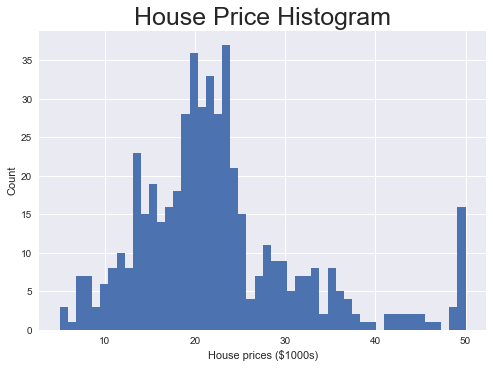

In [57]:
# Plot distribution of target variable

plt.hist(bos['PRICE'], bins=50)                   # bins: width of bars
plt.xlabel("House prices ($1000s)")
plt.ylabel("Count")
plt.title("House Price Histogram", fontsize=25)

The histogram shows that the plot shows a normal distribution (overall), with some outliers, particularly at the top end of house prices.

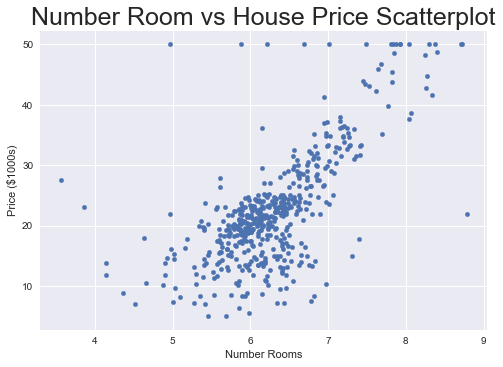

In [60]:
# Scatter plot              
plt.style.use('seaborn')

bos.plot(x='RM', y='PRICE', kind='scatter')
plt.xlabel("Number Rooms")
plt.ylabel("Price ($1000s)")
plt.title("Number Room vs House Price Scatterplot", fontsize=25)
plt.show()

From looking at the scatterplot, we can see that there is a positive correlation between the number of rooms with house price.

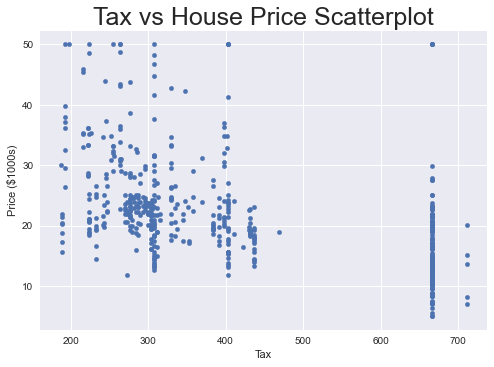

In [64]:
# Scatter plot              
plt.style.use('seaborn')

bos.plot(x='TAX', y='PRICE', kind='scatter')
plt.xlabel("Tax")
plt.ylabel("Price ($1000s)")
plt.title("Tax vs House Price Scatterplot", fontsize=25)
plt.show()

From looking at the scatterplot, there does not appear to be a clear correlation between tax and house price.

In [46]:
# Correlation matrix (heatmap) to measure the correlation between all of the variables.

# create a dataframe with the 13 original features (without the PRICE column)
bos_1 = pd.DataFrame(boston.data, columns = boston.feature_names) 

corr_mat = bos_1.corr().round(2)     # correlation of bos_1 dataframe, (round to 2 dp)
print(corr_mat)

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.39  0.18  -0.36  

Text(0.5, 1.0, 'Variables Heatmap')

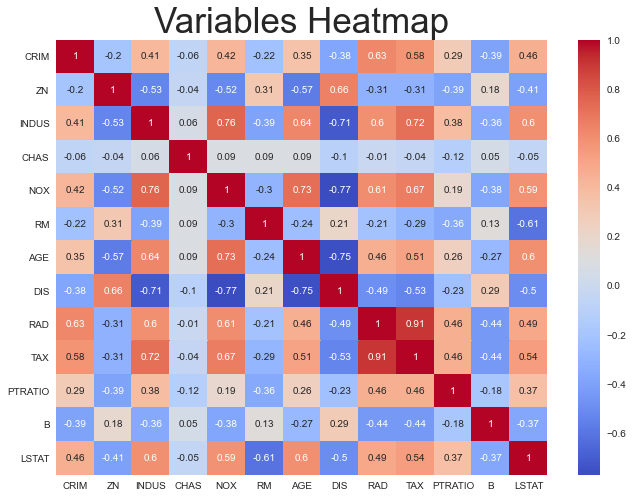

In [67]:
# Heatmap:

plt.figure(figsize = (11,8))                              # Plotsize
sns.heatmap(data=corr_mat, annot=True, cmap='coolwarm')   # Heatmap with numerical values  
plt.title("Variables Heatmap", fontsize=35)

The red boxes represents a stronger negative correlation. Whilst the blue boxes reprents a stronger positive correlation.
There is a strong negative correlation between NOX and DIS (-0.77). Whilst there is a strong positive correlation between RAD and TAX (0.91).

## Linear Regression - Stepwise method

A backwards stepwise linear regression process will be used. This will involve using all variables to build the initial model. Then removing variables that are not significant upon the target variable. This will be determined by removing the variable that has a P-Value greater than 5%.

In [23]:
# Library for stepwise linear regression 
import statsmodels.formula.api as smf

In [50]:
# Linear model: (Y variable ~ X variables)
# All 13 variables will be used in first model.

model_1 = 'PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT'  

In [51]:
# Regression fit
mod1_output = smf.ols(model_1,bos).fit()    

In [52]:
# Ordinary Least Squares output
print(mod1_output.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 04 May 2021   Prob (F-statistic):          6.72e-135
Time:                        20:17:38   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

From looking at the output, variables INDUS and AGE have P-Values greater than 5%. Therefore these will be removed from the next model.

In [61]:
model_2 = 'PRICE ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT' 

In [62]:
# Regression fit
mod2_output = smf.ols(model_2,bos).fit()   

In [63]:
# Ordinary Least Squares output
print(mod2_output.summary())   

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 04 May 2021   Prob (F-statistic):          5.54e-137
Time:                        20:44:14   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

From looking at the output, all variables have P-Values less than 5%. Therefore this model better explains the target variable.

Therefore the linear regression model that best explains the price is:
Price =  36.34CRIM +0.04ZN +2.72CHAS -17.38NOX +3.80RM -1.49DIS +0.30RAD -0.01TAX -0.95PTRATIO + B -0.52LSTAT +36.34

The R-squared value produced from this model is 74.1%, therefore 74.1% of the observered variation can be explained by the model inputs. A R-squared value of 1 would indicates that there is a good relationship between the variables and the Price. 